<a href="https://colab.research.google.com/github/skozh/ADA1/blob/master/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

## **Generate Noisy Data**

In [2]:
k = [*range(0, 1001, 1)]
x = np.array([3*x/1000 for x in k])
fx = 1/(x**2 - 3*x + 2)
print(fx)

[0.5       0.5022579 0.5045317 ... 0.5045317 0.5022579 0.5      ]


In [3]:
y = np.zeros(1001)
noise = np.random.normal(0,1,1001)
for index, val in enumerate(fx):
  if val < -100:
    y[index] = 100 + noise[index]
  elif val >= -100 and val <= 100:
    y[index] = val + noise[index]
  else:
    y[index] = 100 + noise[index]

print(y)

[ 1.00754247  0.68600085  0.30224352 ... -0.10371696  1.55831998
  1.30711037]


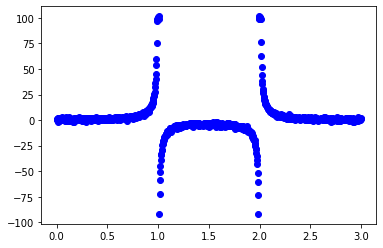

In [4]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')

In [5]:
def fun_rational(x, a, b, c, d):
  return ((a*x+b)/(x**2 + c*x + d))

In [6]:
def objective(params):
  a, b, c, d = params
  y_pred = fun_rational(x, a, b, c, d)
  return np.sum((y-y_pred)**2)

**Nelder-Mead algorithm**

In [7]:
initial = [0.1,0.1,0.1,0.1]
result1 = optimize.minimize(fun=objective, x0=initial,method="Nelder-Mead", tol=0.001) 
result1

 final_simplex: (array([[-1.08073463,  1.09097575, -2.01597386,  1.01606672],
       [-1.08091597,  1.09115904, -2.01597389,  1.01606676],
       [-1.08070135,  1.09094301, -2.0159753 ,  1.01606817],
       [-1.08079962,  1.09104132, -2.01597286,  1.01606571],
       [-1.08080877,  1.09105069, -2.01597279,  1.01606565]]), array([146168.17693316, 146168.17706837, 146168.17722718, 146168.17746515,
       146168.17755974]))
           fun: 146168.17693315732
       message: 'Optimization terminated successfully.'
          nfev: 776
           nit: 467
        status: 0
       success: True
             x: array([-1.08073463,  1.09097575, -2.01597386,  1.01606672])

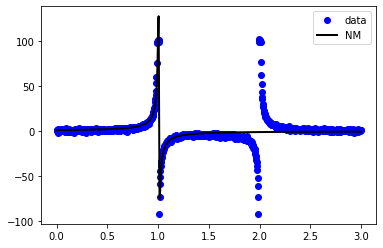

In [8]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, fun_rational(x, result1.x[0],result1.x[1], result1.x[2],result1.x[3]), '-k', lw=2, label='NM')
ax.legend()

**Levenberg-Marquardt algorithm**

In [20]:
p0=[-1,1,-2,1]
result2 = optimize.curve_fit(fun_rational, x, y, method='lm', p0=p0)[0]
result2

array([-1.08253799,  1.09278604, -2.01589851,  1.01599107])

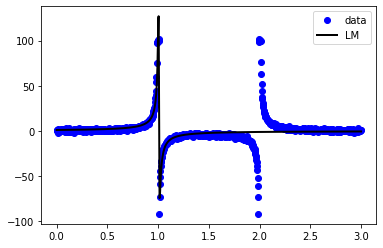

In [21]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, fun_rational(x, result2[0],result2[1], result2[2],result2[3]), '-k', lw=2, label='LM')
ax.legend()

**Differential Evolution**

In [54]:
bounds = [(-100, 100), (-100, 100), (-100, 100), (-100, 100)]
result3 = optimize.differential_evolution(func=objective, bounds=bounds, strategy='best2bin') 
result3

     fun: 146168.17850497452
     jac: array([ 1039.65285234,  1029.78083305, 15697.89019413, 15519.16939206])
 message: 'Optimization terminated successfully.'
    nfev: 1535
     nit: 5
 success: True
       x: array([-1.0806198 ,  1.09086034, -2.01597688,  1.01606975])

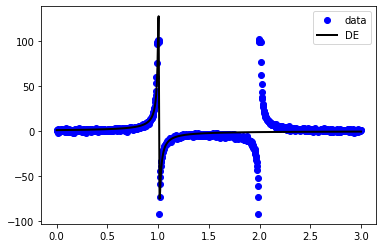

In [55]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, fun_rational(x, result3.x[0],result3.x[1], result3.x[2],result3.x[3]), '-k', lw=2, label='DE')
ax.legend()

**Simulated Annealing**

In [58]:
initial=[-2,1,-3,1]
bounds = [(-100, 100), (-100, 100), (-100, 100), (-100, 100)]
result4 = optimize.dual_annealing(func=objective, no_local_search=True, bounds=bounds, x0=initial) 
result4

     fun: 204331.542149927
 message: ['Maximum number of iteration reached']
    nfev: 8001
    nhev: 0
     nit: 1000
    njev: 0
  status: 0
 success: True
       x: array([ 74.53786819, -93.93570331,  76.19635167, -77.93625352])

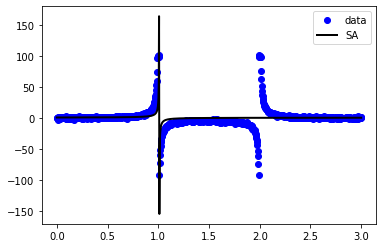

In [59]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, fun_rational(x, result4.x[0],result4.x[1], result4.x[2],result4.x[3]), '-k', lw=2, label='SA')
ax.legend()

**Combined Plot**

<Figure size 1440x720 with 0 Axes>

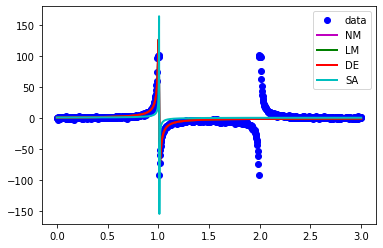

In [63]:
plt.figure(figsize=(20,10))
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, fun_rational(x, result1.x[0],result1.x[1], result1.x[2],result1.x[3]), '-m', lw=2, label='NM')
ax.plot(x, fun_rational(x, result2[0],result2[1], result2[2],result2[3]), '-g', lw=2, label='LM')
ax.plot(x, fun_rational(x, result3.x[0],result3.x[1], result3.x[2],result3.x[3]), '-r', lw=2, label='DE')
ax.plot(x, fun_rational(x, result4.x[0],result4.x[1], result4.x[2],result4.x[3]), '-c', lw=2, label='SA')
ax.legend()